# Mall Customer Segmentation

The mall_customers dataset contains information about people visiting the mall. The dataset has customer id, gender, age, annual income, and spending score. It collects insights from the data and group customers based on their behaviors.

Segment the customers based on the age, gender, and annual income.

## Import CSV file

In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
# Read mall_customers CSV file into DataFrame
df = pd.read_csv("mall_customers.csv", index_col=0)

## The data at a glance

In [3]:
# Get dimensions
df.shape

(200, 4)

In [4]:
# Get keys
df.keys()

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [5]:
# Get first 5 rows
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
# Add a new column for mapped gender (0 = Female, 1 = Male)

def map_gender(gender):
    if gender == 'Female':
        return 0
    else:
        return 1

df['Gender Mapped'] = df['Gender'].apply(map_gender)

In [7]:
# Get last 5 rows
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Mapped
CustomerID,,,,,
196,Female,35,120,79,0
197,Female,45,126,28,0
198,Male,32,126,74,1
199,Male,32,137,18,1
200,Male,30,137,83,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 5 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
Gender Mapped             200 non-null int64
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender Mapped
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


## Relationship between columns

In [10]:
corr = df.corr()
corr

,Age,Annual Income (k$),Spending Score (1-100),Gender Mapped
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender Mapped,0.060867,0.056410,-0.058109,1.000000


In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

## Numerical analysis and visualization

### Gender

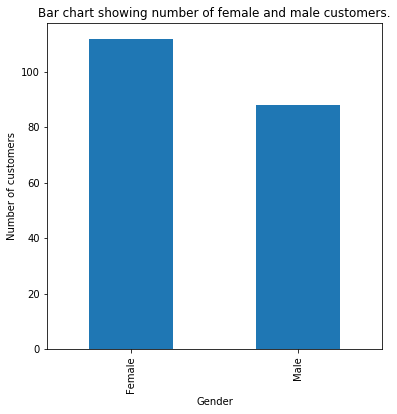

In [12]:
# Plot 'Gender' bar chart
ax = df['Gender'].value_counts().plot(kind='bar', figsize=(6,6))
ax_title = ax.set_title("Bar chart showing number of female and male customers.")
ax_xlabel = ax.set_xlabel('Gender')
ax_ylabel = ax.set_ylabel('Number of customers')

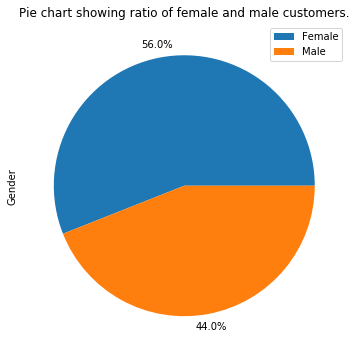

In [13]:
# Plot 'Gender' pie chart
ax = df['Gender'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.1f%%', pctdistance=1.1, labeldistance=None, legend=True)
ax_title = ax.set_title("Pie chart showing ratio of female and male customers.")

### Age

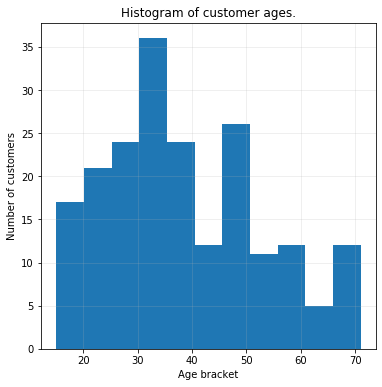

In [14]:
# Plot 'Age' histogram
ax = df['Age'].plot(kind='hist', figsize=(6,6), bins=11, grid=True, range=(15,71))
ax_title = ax.set_title("Histogram of customer ages.")
ax_xlabel = ax.set_xlabel('Age bracket')
ax_ylabel = ax.set_ylabel('Number of customers')
ax.grid(alpha=0.25)

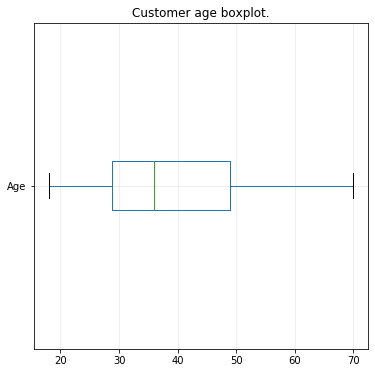

In [15]:
# 'Age' boxplot
ax = df['Age'].plot(kind='box', vert=False, figsize=(6,6))
ax_title = ax.set_title("Customer age boxplot.")
ax.grid(alpha=0.25)

### Annual Income

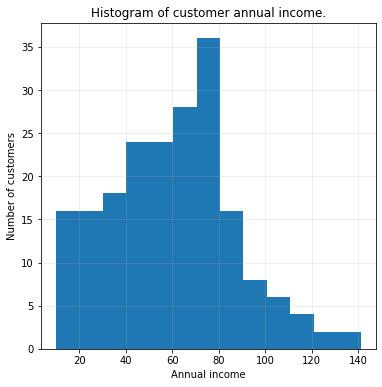

In [16]:
# Plot 'Annual Income' histogram
ax = df['Annual Income (k$)'].plot(kind='hist', figsize=(6,6), bins=13, grid=True, range=(10,141))
ax_title = ax.set_title("Histogram of customer annual income.")
ax_xlabel = ax.set_xlabel('Annual income')
ax_ylabel = ax.set_ylabel('Number of customers')
ax.grid(alpha=0.25)

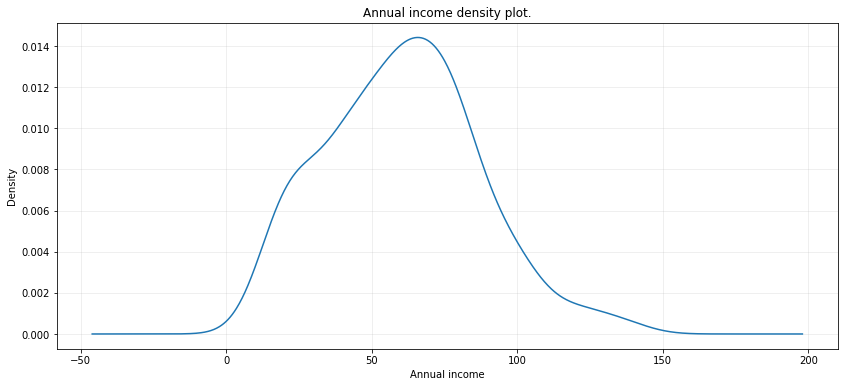

In [17]:
# 'Annual Income' density plot
ax = df['Annual Income (k$)'].plot(kind='density', figsize=(14,6), grid=True)
ax_title = ax.set_title("Annual income density plot.")
ax_xlabel = ax.set_xlabel('Annual income')
ax_ylabel = ax.set_ylabel('Density')
ax.grid(alpha=0.25)

### Spending Score

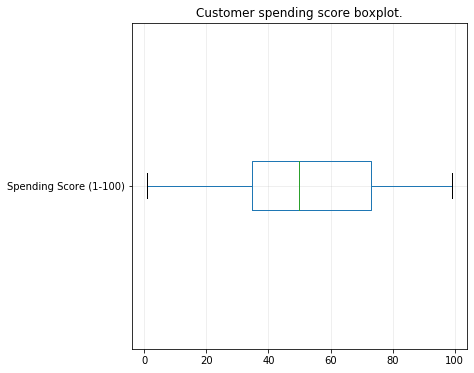

In [18]:
# 'Spending Score' boxplot
ax = df['Spending Score (1-100)'].plot(kind='box', vert=False, figsize=(6,6))
ax_title = ax.set_title("Customer spending score boxplot.")
ax.grid(alpha=0.25)

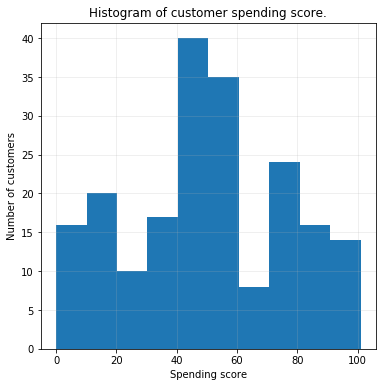

In [19]:
# Plot 'Spending Score' histogram
ax = df['Spending Score (1-100)'].plot(kind='hist', figsize=(6,6), bins=10, grid=True, range=(0,101))
ax_title = ax.set_title("Histogram of customer spending score.")
ax_xlabel = ax.set_xlabel('Spending score')
ax_ylabel = ax.set_ylabel('Number of customers')
ax.grid(alpha=0.25)

## K-mean clustering

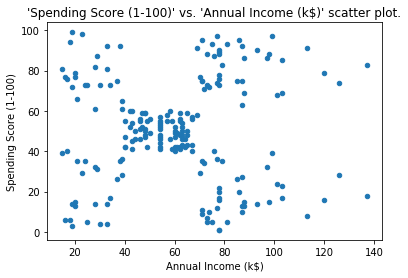

In [20]:
# Scatter plot 'Spending Score (1-100)' vs 'Annual Income (k$)'
ax = df.plot.scatter(x='Annual Income (k$)', 
                     y='Spending Score (1-100)', 
                     title="'Spending Score (1-100)' vs. 'Annual Income (k$)' scatter plot.")

In [21]:
# Select features
features = df.iloc[:,2:4]
features.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


### Finding optimal K

#### 1. Elbow Method

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
k_max = 10
start = 2
k_values = list(range(start, k_max+1))

# Minimum of 2 clusters needed
for i in range(start, k_max+1):
  kmeans = KMeans(n_clusters = i).fit(features)
  sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'Sum of squared errors vs. K value')

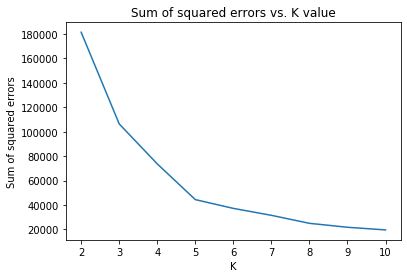

In [23]:
ax = plt.plot(k_values, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.title('Sum of squared errors vs. K value')

#### 2. Silhouette Method

In [24]:
sil_scores = []

# Minimum of 2 clusters needed
for i in range(start, k_max+1):
  kmeans = KMeans(n_clusters = i).fit(features)
  labels = kmeans.labels_
  sil_scores.append(silhouette_score(features, labels, metric = 'euclidean'))

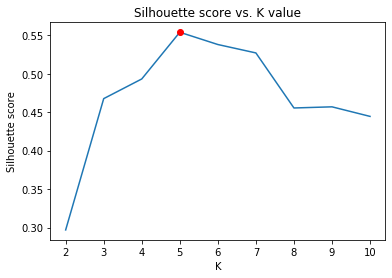

In [25]:
ax = plt.plot(k_values, sil_scores)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. K value')
y_max = max(sil_scores)
x_max = sil_scores.index(y_max) + start
plt.plot(x_max, y_max, 'ro')